# IEEE-CIS Fraud Detection Time Series Heatmaps

Really amazing notebook from https://www.kaggle.com/jtrotman/ieee-fraud-time-series-heatmaps so I wanted to test it.

This notebook shows counts of transactions over time in a 2D heatmap, as a simple exploration of the time series structure of the train/test sets.

One row of pixels in each image is 1 day, with about 183 rows in each image, derived from the training set, and later on, the test set.

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import gc, os, sys, re, time
import numpy as np
import pandas as pd

from src.dataset.data import Dataset
from src.visualization.visualize import make_ts_heatmap, show_ts_heatmap, save_ts_heatmap

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 50
pd.options.display.max_columns = None

from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [4]:
ds = Dataset()
ds.load_dataset()

In [5]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['isFraud'] = y

## Let's try this

In [9]:
make_ts_heatmap(X, 'TransactionID>0').shape

(183, 480)

TransactionID>0 590540 transactions


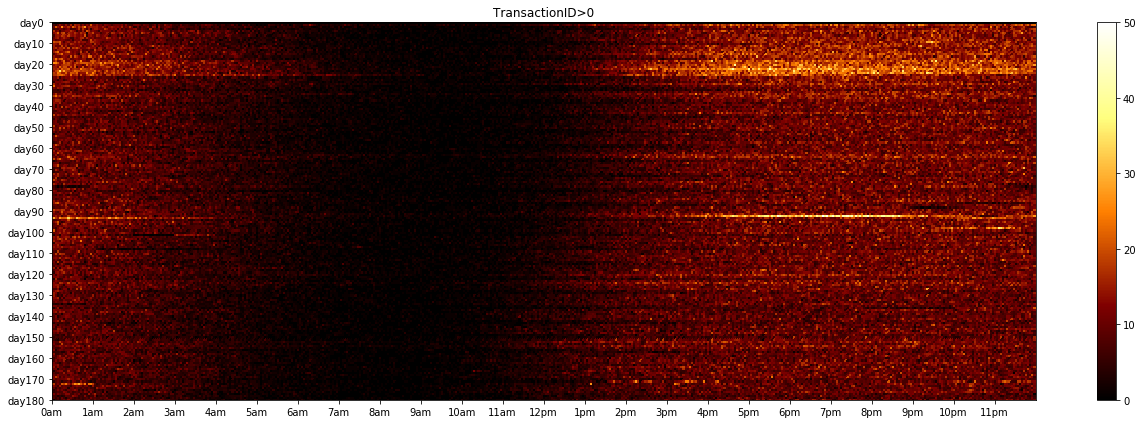

In [11]:
show_ts_heatmap(X, 'TransactionID>0')

TransactionID>0 590540 transactions


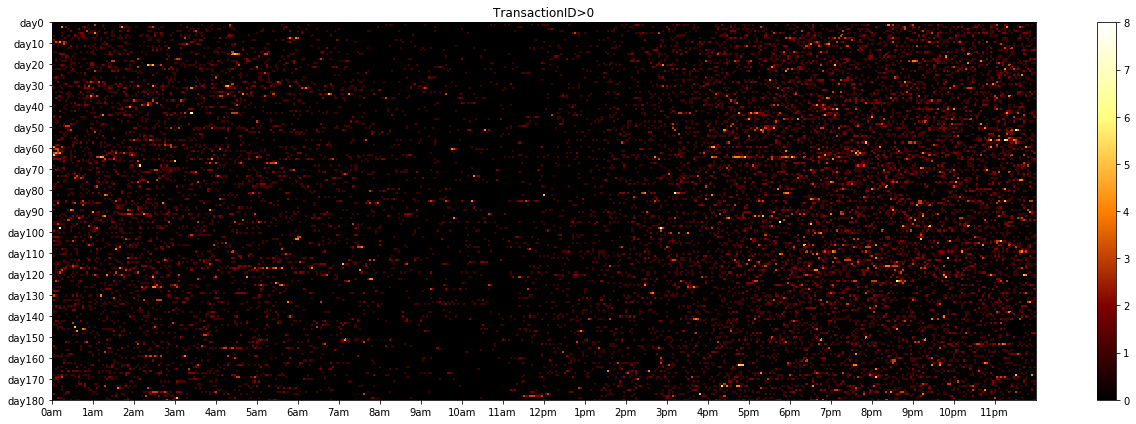

In [12]:
show_ts_heatmap(X, 'TransactionID>0', True)

isFraud==1 20663 transactions


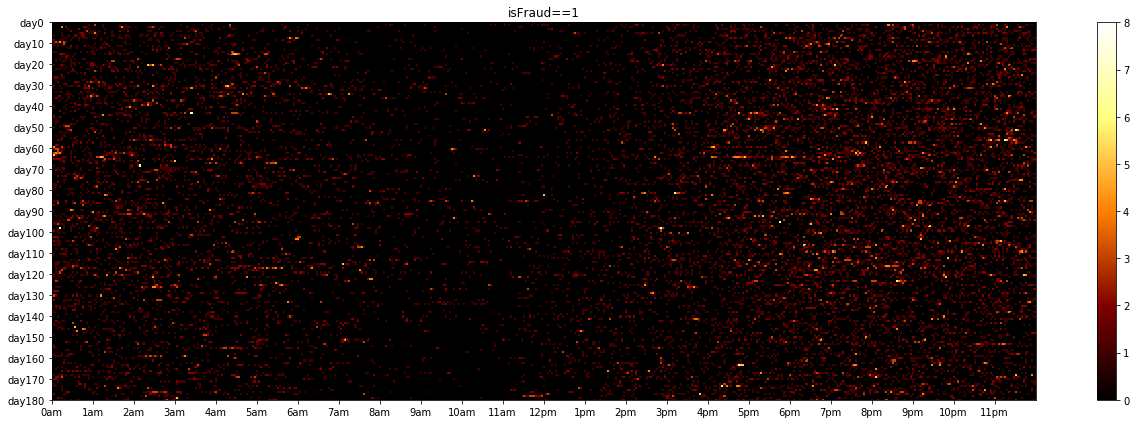

In [14]:
show_ts_heatmap(X, 'isFraud==1')

D4.isnull() 168922 transactions


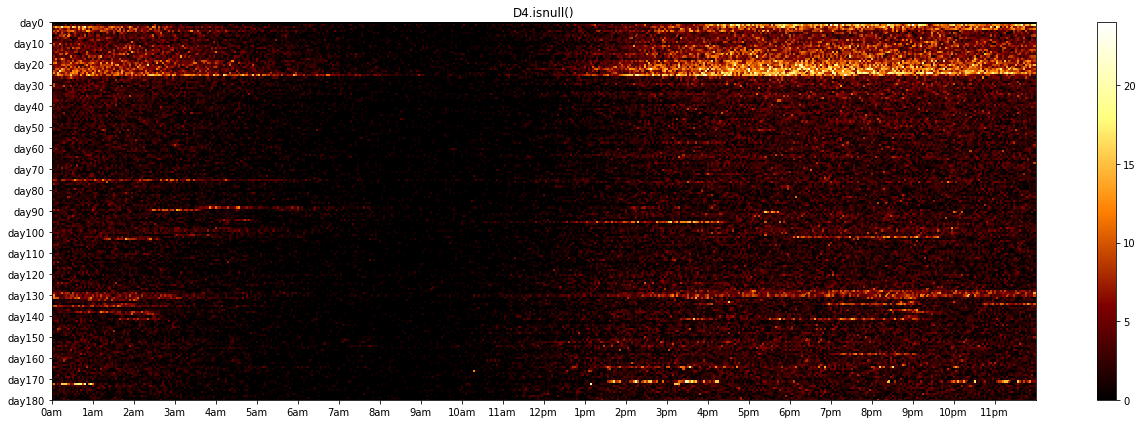

In [15]:
show_ts_heatmap(X, 'D4.isnull()')

D15.isnull() 89113 transactions


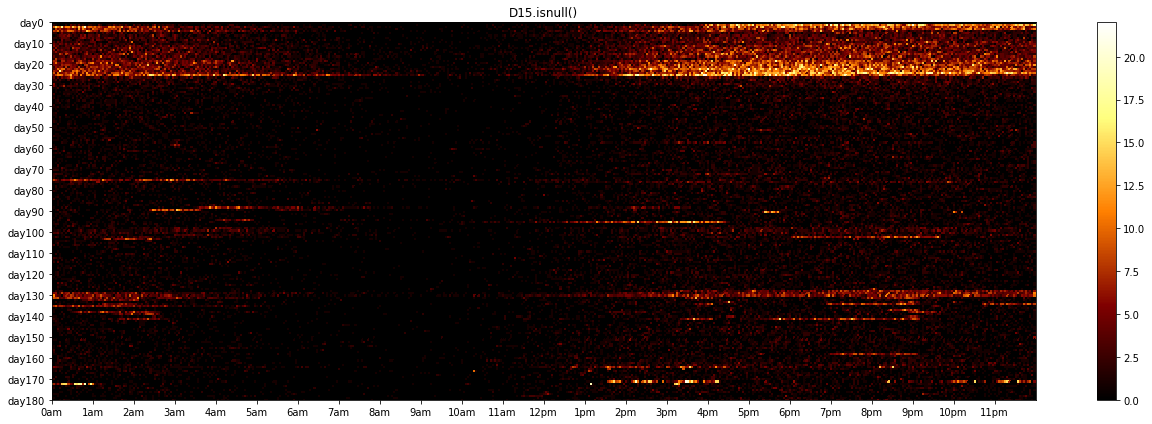

In [16]:
show_ts_heatmap(X, 'D15.isnull()')

card1==7919 14932 transactions


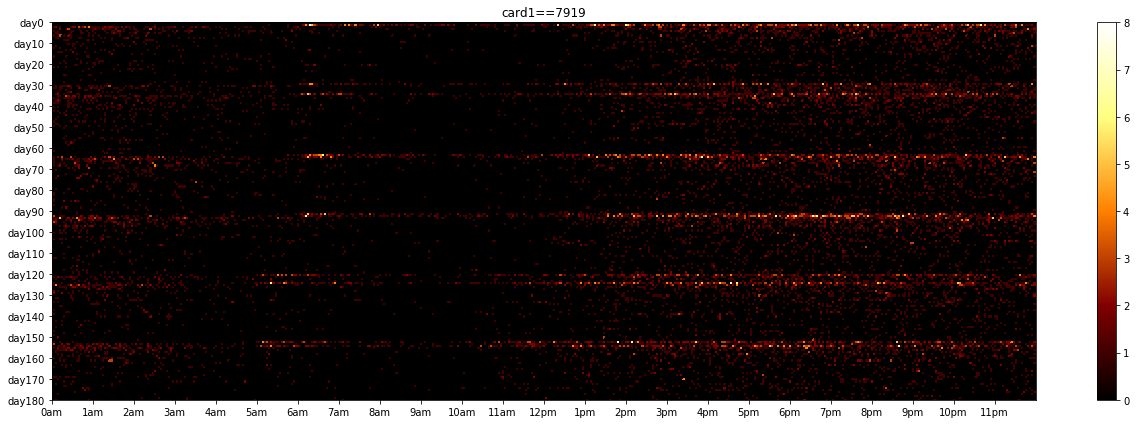

In [17]:
show_ts_heatmap(X, 'card1==7919')

card2==194 16938 transactions


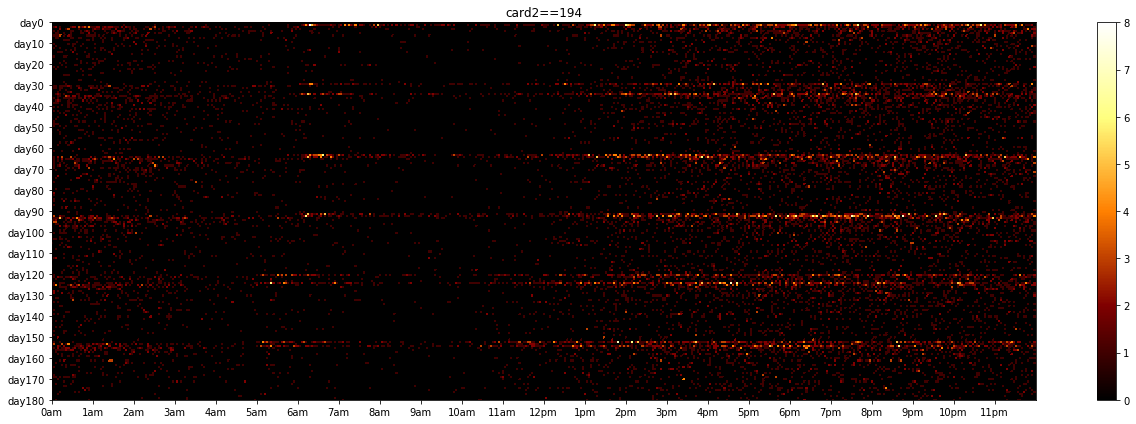

In [18]:
show_ts_heatmap(X, 'card2==194')

card2.isnull() 8933 transactions


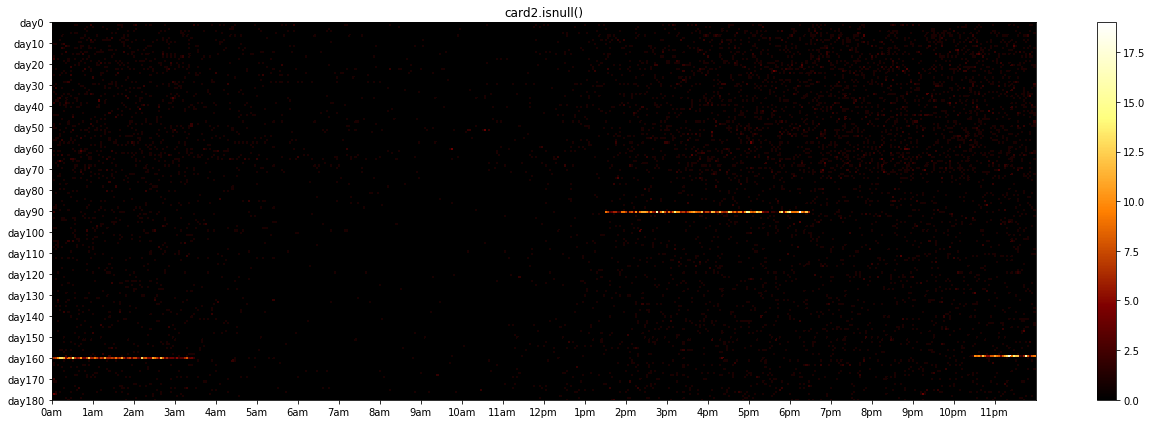

In [19]:
show_ts_heatmap(X, 'card2.isnull()')

card5==202 7103 transactions


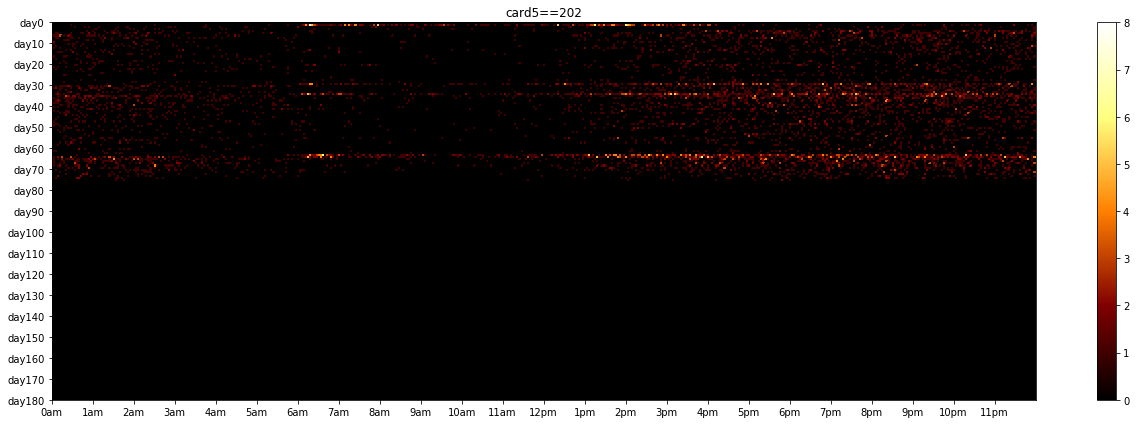

In [20]:
show_ts_heatmap(X, 'card5==202')

card5==126 10298 transactions


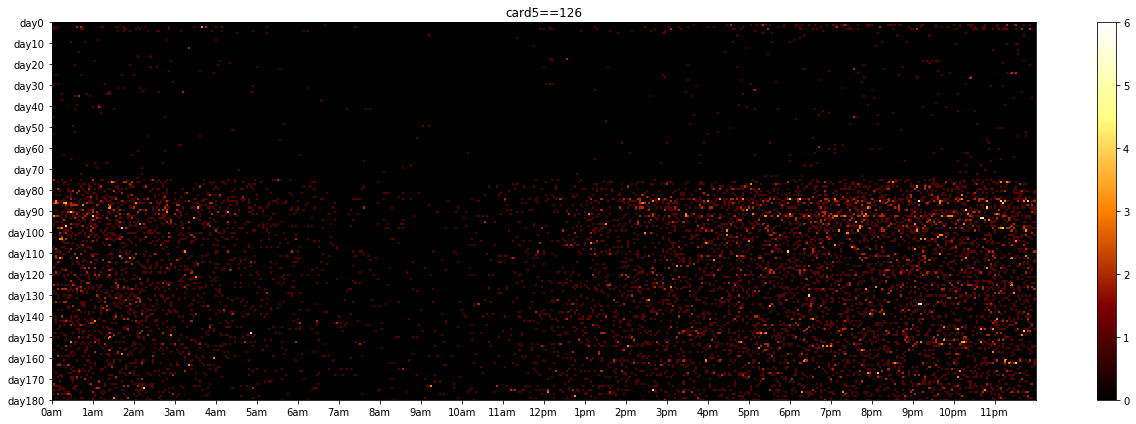

In [21]:
show_ts_heatmap(X, 'card5==126')

R_emaildomain=="gmail.com" 57147 transactions


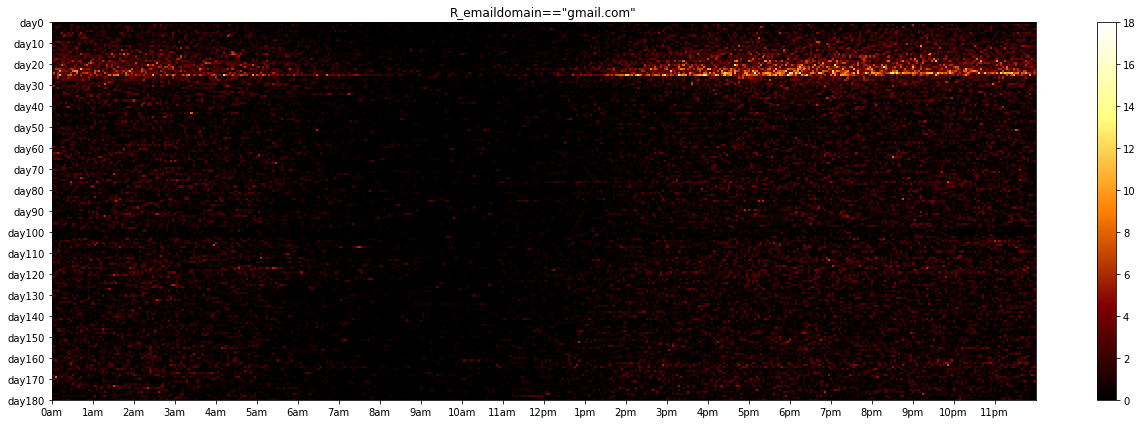

In [22]:
show_ts_heatmap(X, 'R_emaildomain=="gmail.com"')

D6==0 45782 transactions


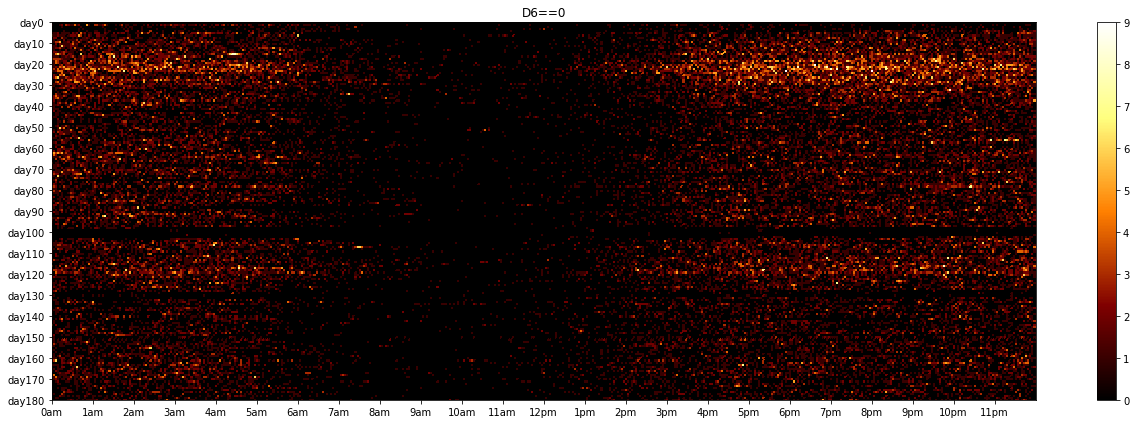

In [23]:
show_ts_heatmap(X, 'D6==0')

D9==0.75 5147 transactions


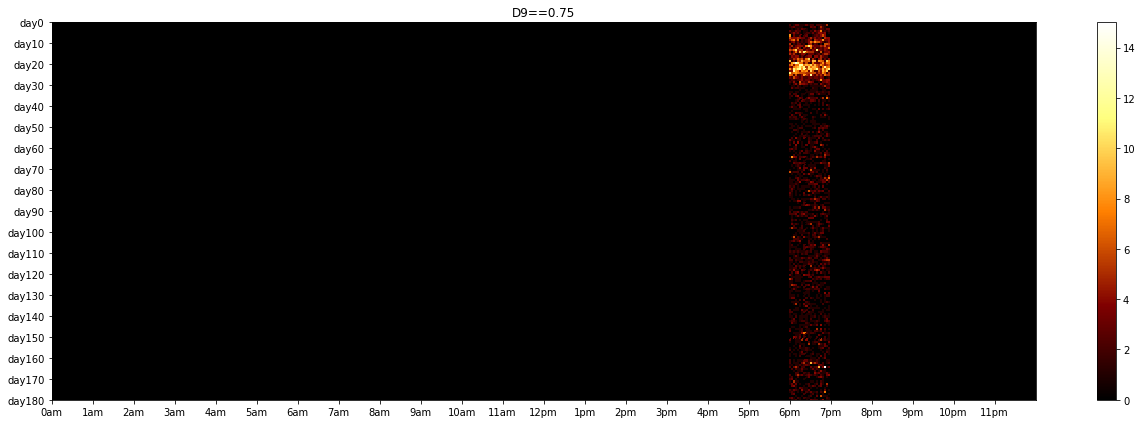

In [24]:
show_ts_heatmap(X, 'D9==0.75')

ProductCD=="S" 11628 transactions


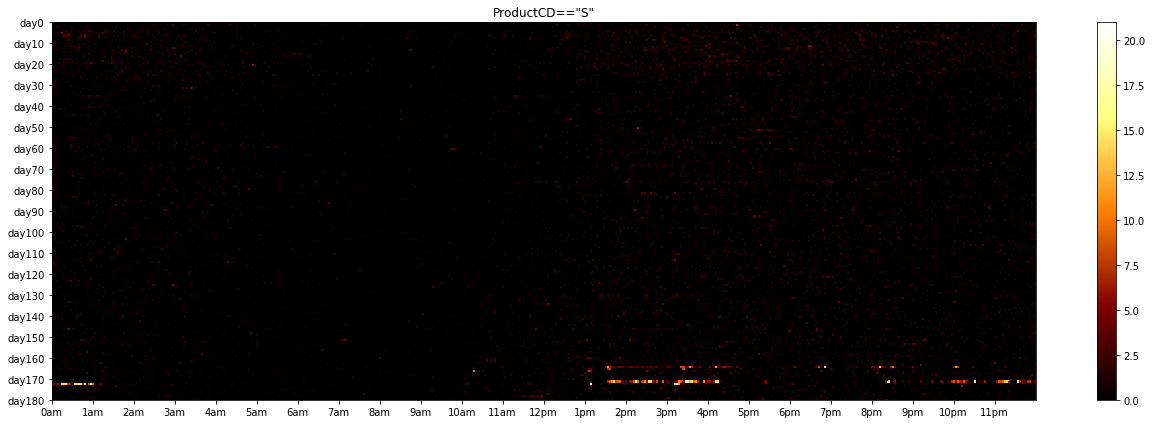

In [25]:
show_ts_heatmap(X, 'ProductCD=="S"')

(P_emaildomain.isnull()) and (TransactionAmt<=30) 13875 transactions


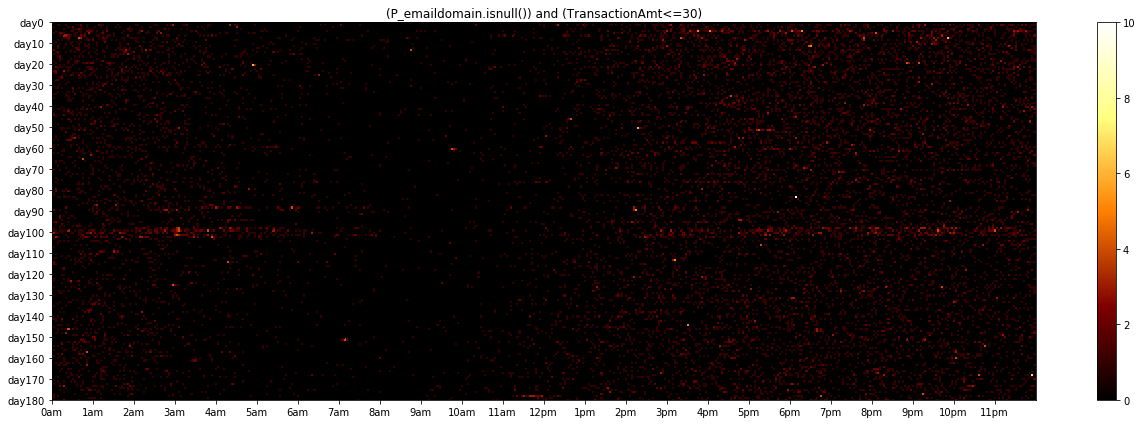

In [26]:
show_ts_heatmap(X, '(P_emaildomain.isnull()) and (TransactionAmt<=30)')

To make test look like train, subtract 213 days, then reuse the above code. Note day0 .. day183 in the plots now refers to test set days.

In [27]:
X_test.TransactionDT.min() / 86400

213.00027777777777

In [28]:
X_test['TransactionDT'] -= 213 * 86400

TransactionID>0 506691 transactions


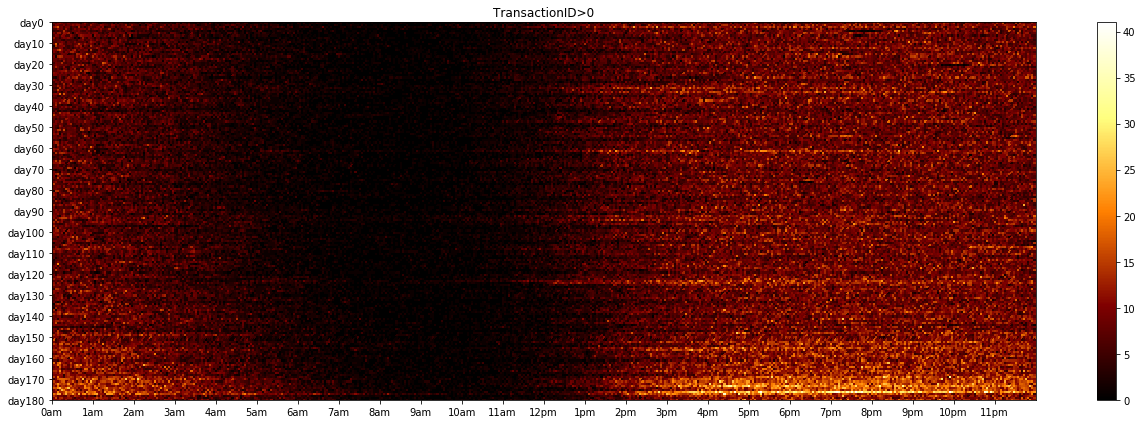

In [29]:
show_ts_heatmap(X_test, 'TransactionID>0')

D9==0.75 5033 transactions


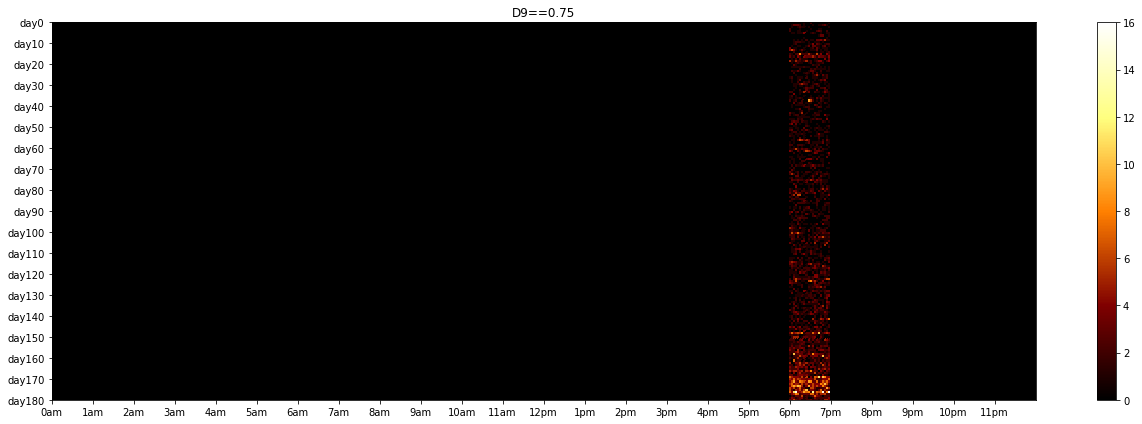

In [30]:
show_ts_heatmap(X_test, 'D9==0.75')

card1==7919 13083 transactions


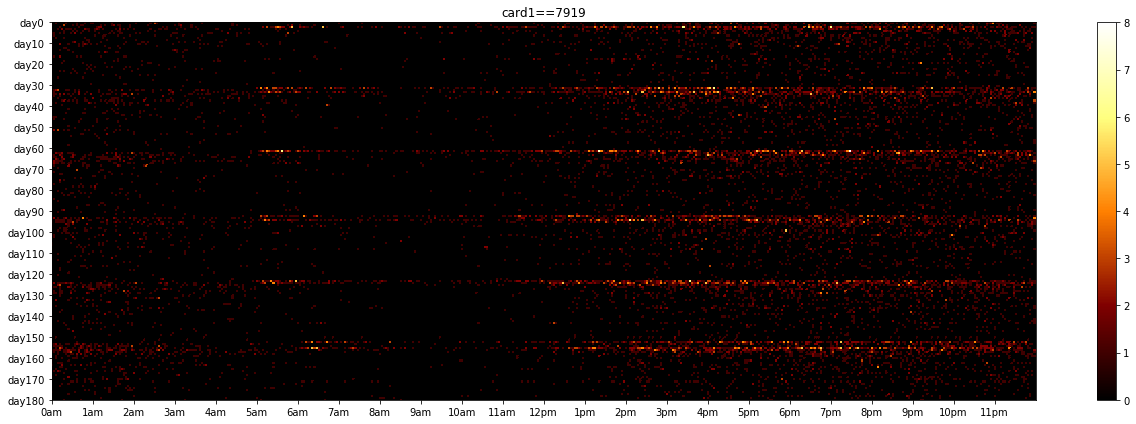

In [31]:
show_ts_heatmap(X_test, 'card1==7919')

ProductCD=="S" 11418 transactions


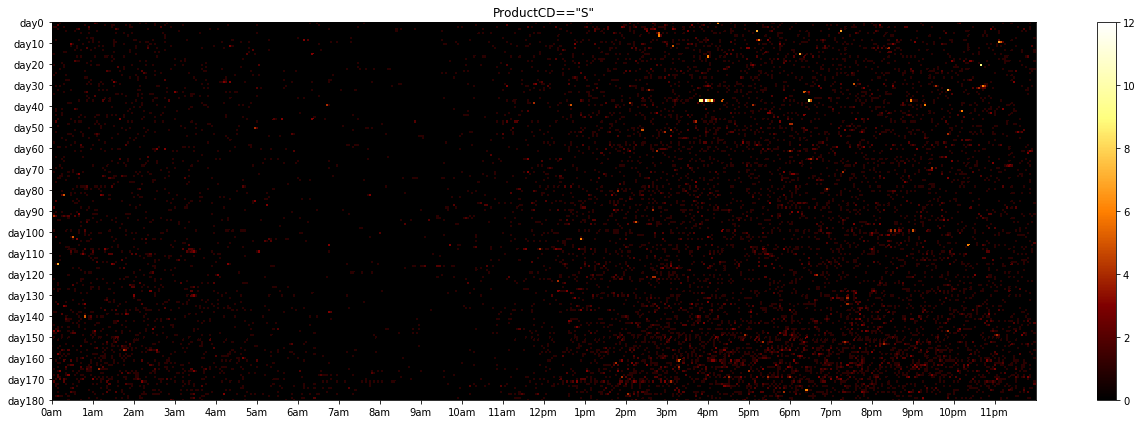

In [32]:
show_ts_heatmap(X_test, 'ProductCD=="S"')

ProductCD=="R" 35647 transactions


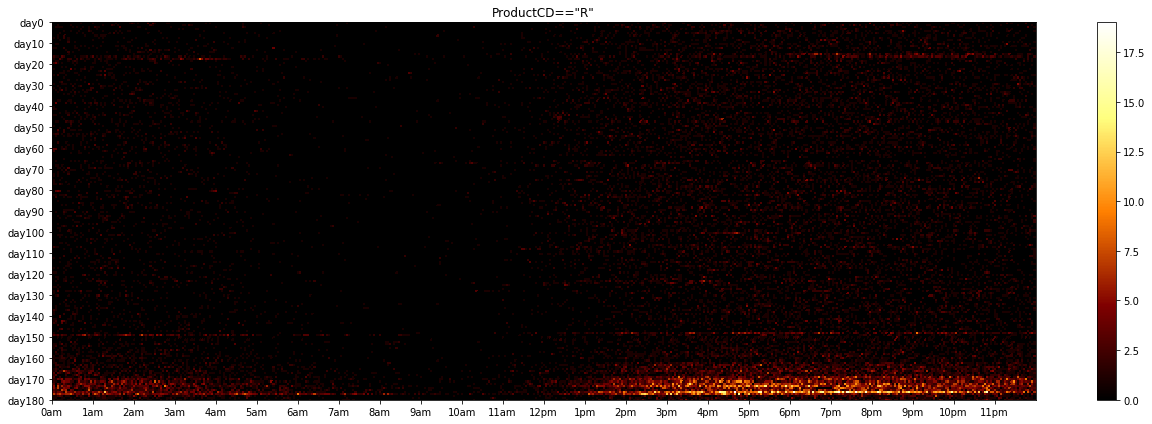

In [33]:
show_ts_heatmap(X_test, 'ProductCD=="R"')

ProductCD=="H" 29373 transactions


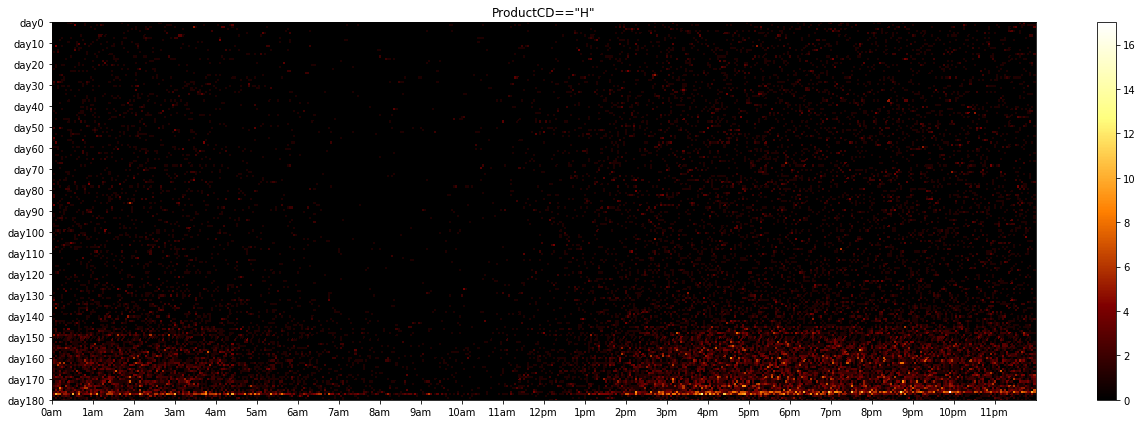

In [34]:
show_ts_heatmap(X_test, 'ProductCD=="H"')

### Notes
Much more is possible here, for example, count all transactions, then count subsets like

`ProductCD==X`

and

`ProductCD==X and isFraud==1`

then apply Bayes rule to get `p(isFraud | ProductCD==X)` and color cells in accordingly, e.g. `p(isFraud)` as the red channel in RGB.

Also `np.add.at(c, ts, 1)` can be changed to `np.add.at(c, ts, df.isFraud)` to accumulate values instead of simply count transctions.

# Save lots of plots

In [35]:
def save_all(df, cols, base_dir, display_fraud=False):
    os.makedirs(base_dir, exist_ok=True)
    for col in tqdm(cols):
        vc = df[col].value_counts(dropna=False)
        for value, count in vc.items():
            if count < 5000:
                continue
            #print(col, value, count)
            filename = f'{col}_{value}_{count}'.replace("/", "_")
            path = f'{base_dir}/{filename}.png'
            
            if type(value) is float and np.isnan(value):
                save_ts_heatmap(df, f'{col}.isnull()', path, display_fraud)
            else:
                save_ts_heatmap(df, f'{col}=="{value}"', path, display_fraud)

In [36]:
save_all(X, X.columns, '../../reports/figures/heatmaps')

In [37]:
save_all(X, X.columns, '../../reports/figures/heatmaps_fraud', True)

In [38]:
save_all(X_test, X_test.columns, '../../reports/figures/heatmaps_test')